## Data Description

Major League is an american professional baseball organization and one of the oldest sports leagues in united states.
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df= pd.read_csv(r"baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df=df.sample(frac=1)

In [4]:
df.shape

(30, 17)

data has 30 rows and 17 columns

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Columns:

W: Number of predicted Wins

R: Runs

AB: At Bats

H: Hits

2B: Doubles

3B: Triples

HR: Homeruns

BB: Walks

SO: StrikeOut

SB: Stolen Bases

RA: Runs Allowed

ER: Earned Runs

ERA: Earned Runs Average

SHO: ShoutOuts

SV: Saves

CG: Complete Games

E: Error

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 27 to 14
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


All values are non null and of numeric type

### Univariate Analysis

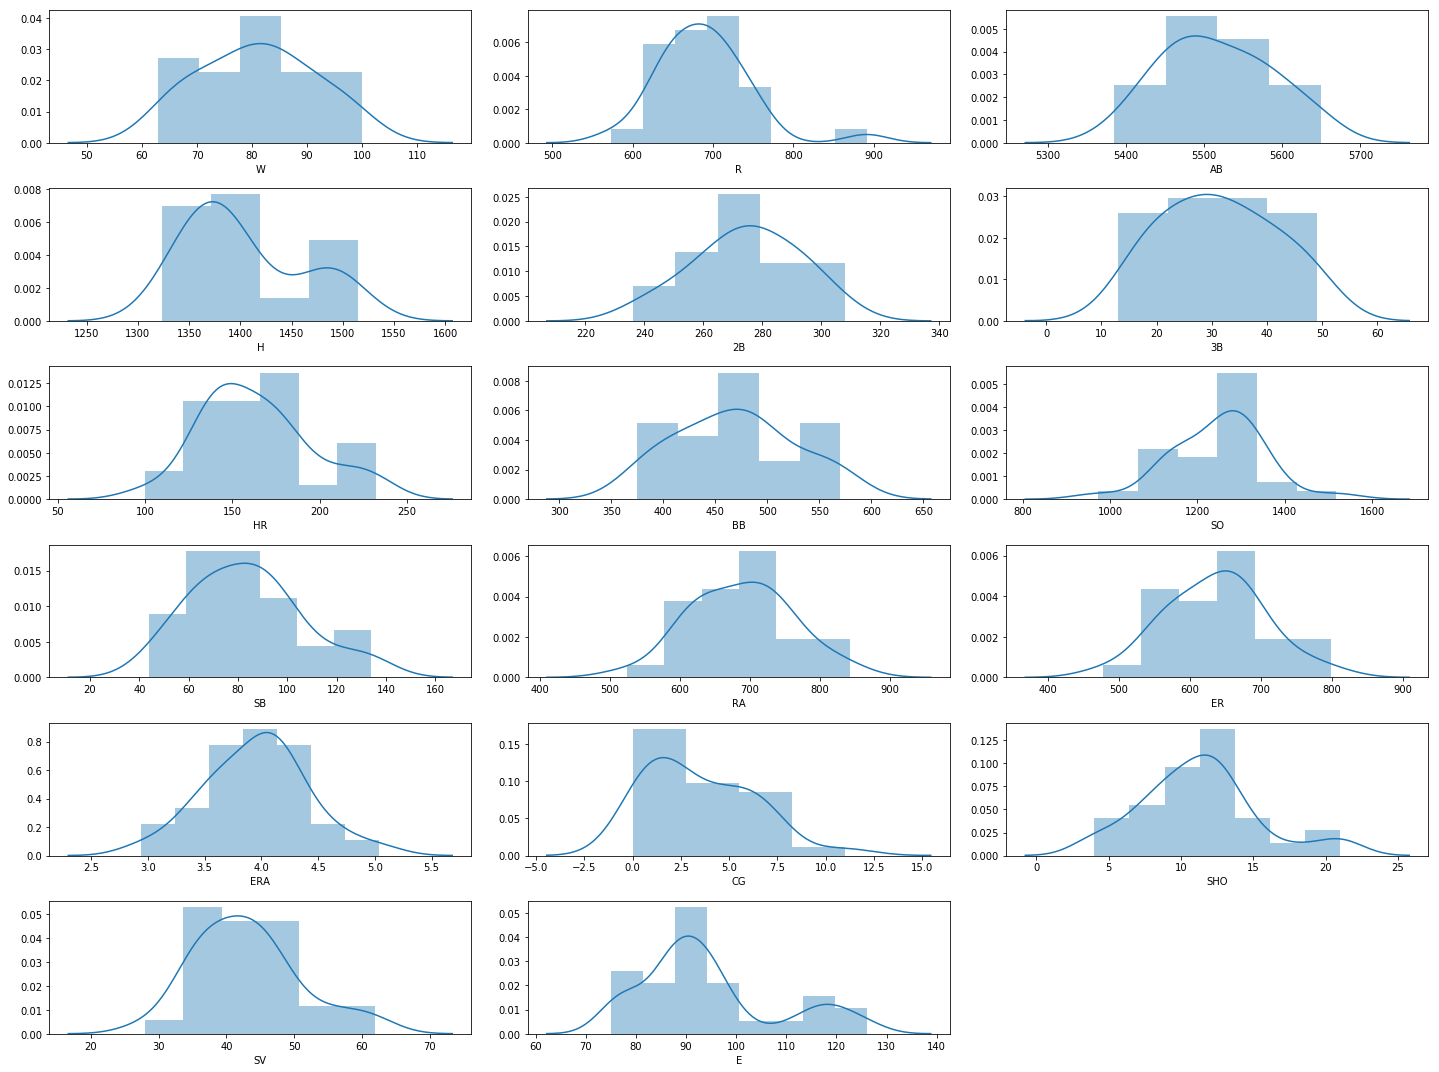

In [7]:
## checking for Normal Distribution of curve
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.tight_layout()

From above plot we observe skewness in data thus data is not normally distributed.

#### Describing Data

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


we can observe mean standard deviation, minimum and maximum values of the features.

#### W

Mean= 80.96, std= 10.45, min= 63, max= 100

#### R

Mean= 688.23, std= 58.76, min= 573, max= 891

#### AB

Mean= 5516.27, std= 70.47, min= 5385, max= 5649

#### H

Mean= 1403.53, std= 57.14, min= 1324, max= 1515

#### 2B

Mean= 274.73, std= 18.095, min= 236, max= 308

#### 3B

Mean= 31.3, std= 10.45, min= 13, max= 49

#### HR

Mean= 163.63, std= 31.823, min= 100, max= 232

#### BB

Mean= 469.1, std= 57.053, min= 375, max= 570

#### SO

Mean= 1248.2, std= 103.75, min= 973, max= 1518

#### SB

Mean= 83.5 , std= 22.81, min= 44, max= 134

#### RA

Mean= 688.23, std= 72.1, min= 525, max= 844

#### ER

Mean= 635.83, std= 70.14, min= 478, max= 799

#### ERA

Mean= 3.95, std= 0.45, min= 2.94, max= 5.04

#### CG

Mean= 4.66, std= 2.76, min= 0, max= 11

#### SHO

Mean= 11.3, std= 4.12, min= 4, max= 21

#### SV

Mean= 43.06, std= 7.87, min= 28, max= 62

#### E

Mean= 94.33, std= 13.95, min= 75, max= 126

### Correlation

In [9]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [10]:
corr_mat=df.corr()
corr_mat["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Maximum correlation : Earned Runs Average

Minimum Correlation: Hits

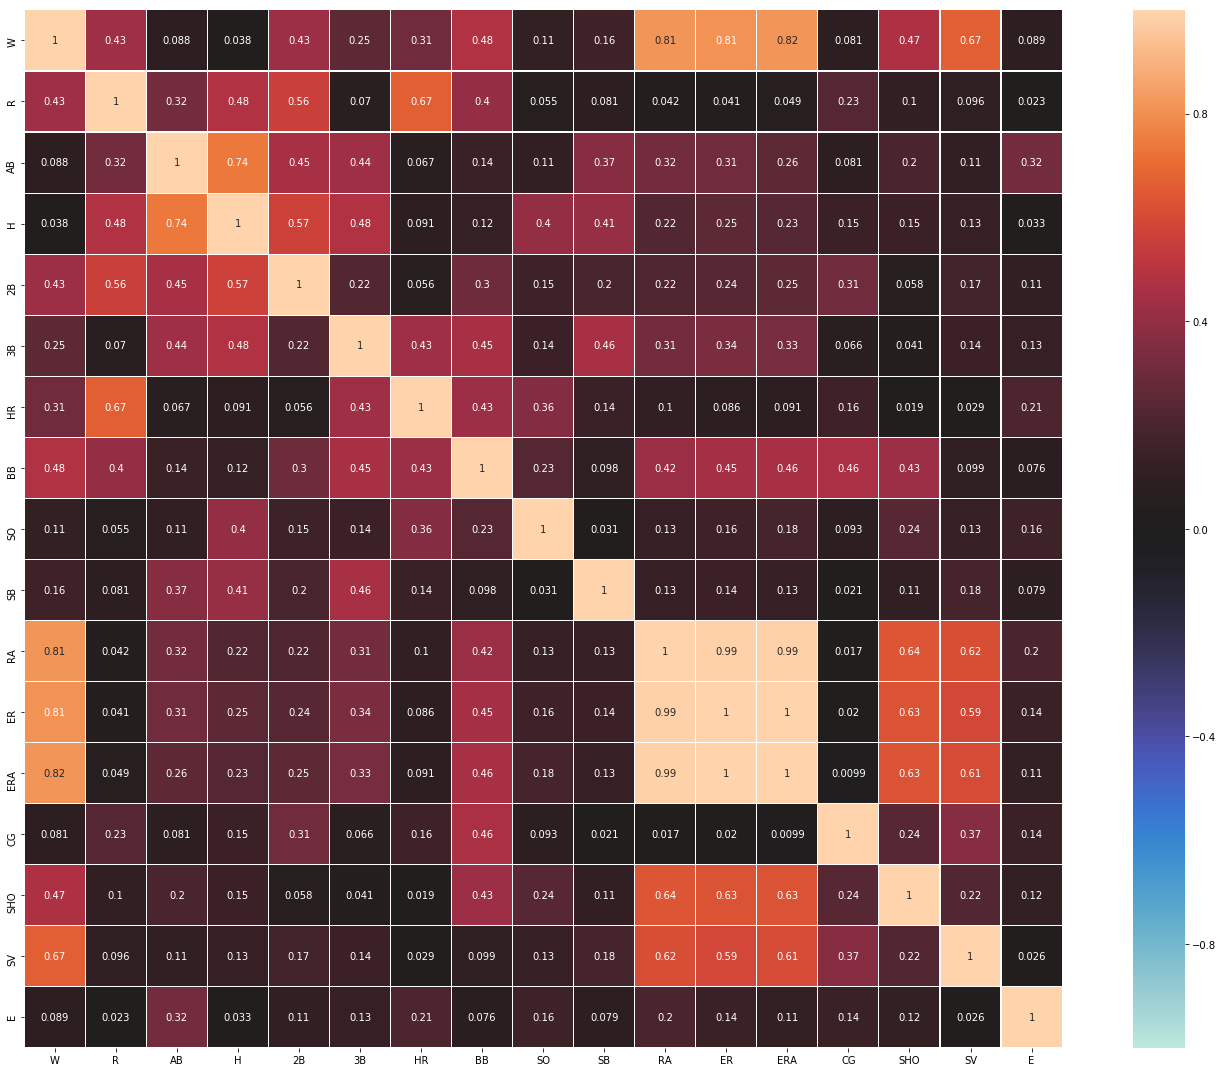

In [11]:
df_corr= df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We also observe high correlation between RA, ER and ERA. Also a good correlation between RA and SV, RA and SHO, ERA and SV, ERA and SHO, ER and SV and ER and SHO.

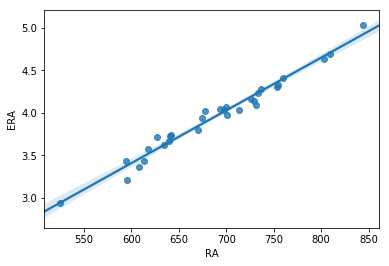

In [12]:
sns.regplot(x="RA",y="ERA",data=df)

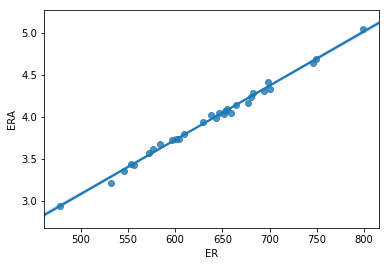

In [13]:
sns.regplot(x="ER",y="ERA",data=df)

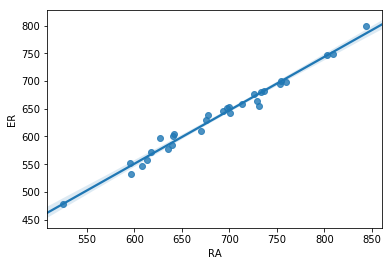

In [14]:
sns.regplot(x="RA",y="ER",data=df)

We observe a strong linear relationship between these 3 variables

### Check for outliers

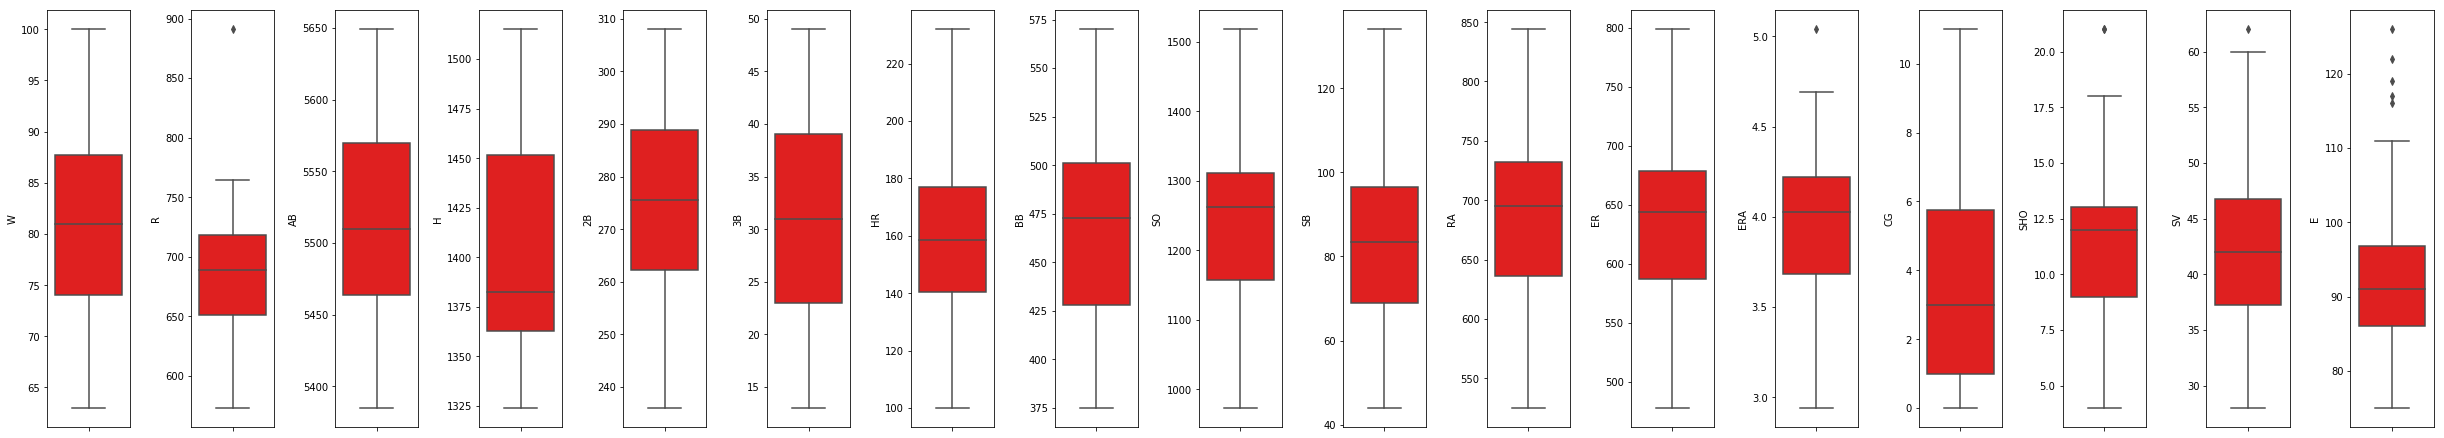

In [15]:
collist=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

## Data Cleaning

We observe very few outliers but since our data is very less we will not remove them but check for skewness and transform our data to remove skewness. Also since we observe a very strong correlation between ER,ERA and RA we will keep the feature which has high correlation with out target variable W.

In [16]:
df=df.drop(columns=["CG","E","H","AB"],axis=1)

In [132]:
df=df.sample(30)

In [17]:
from scipy import stats
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df_new=df.drop(df.index[index])
df_new.shape

(29, 13)

In [135]:
x=df_new.drop(columns=["W"],axis=1)
y= df_new["W"]

In [136]:
x.skew()

R     -0.215364
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64

We observe skeness therefore we will mow transform our data.

In [137]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

## Model Building

In [138]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

In [149]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=4)

In [150]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
print("Sore= ",lm.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.5716060128762817
mean squared error=  36.88873848498143


In [151]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
y_pred=lasso_reg.predict(x_test)
print("Sore= ",lasso_reg.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.6442024206486767
mean squared error=  30.63750718445536


In [152]:
ridgecv= RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize= True)
ridgecv.fit(x_train, y_train)
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
print("Sore= ",ridge_model.score(x_train,y_train))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.9625545387360082
mean squared error=  33.25099355866478


In [153]:
from sklearn.ensemble import RandomForestRegressor

In [154]:
clf= RandomForestRegressor()
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
print("Sore= ",clf.score(x_test,y_test))
print("mean squared error= ",mean_squared_error(y_test,y_pred))

Sore=  0.42415518054799517
mean squared error=  49.585637499999976


In [155]:
cross_val_score(lm,x_train, y_train,cv=5).mean()

-0.33391001332255155

In [156]:
cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()

0.5989902256323164

In [157]:
cross_val_score(ridge_model,x_train, y_train,cv=5).mean()

0.41330238608545

In [158]:
cross_val_score(clf,x_train, y_train,cv=5).mean()

-0.8188486783692236

### Hyper Parametric Tuning

In [159]:
lasscv=LassoCV()
param={'eps':[0.001,0.002,0.004],'n_alphas':[100,120] ,'max_iter':[500,1000],'alphas':[np.arange(0.001,0.1,0.01)]}
grid_search=GridSearchCV(estimator=lasscv, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'alphas': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]), 'eps': 0.001, 'max_iter': 500, 'n_alphas': 100}


In [160]:
lasscv=LassoCV(eps=0.001, max_iter=500, n_alphas=100, alphas=[0.001,0.011,0.021,0.031,0.041,0.051,0.061,0.071,0.081,0.091])
lasscv.fit(x_train, y_train)
lasscv.score(x_test, y_test)

0.6279572921177831

In [161]:
print("R2 Score = ",lasscv.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

R2 Score =  0.6279572921177831
Mean Squared Error=  49.585637499999976


### Saving Model

In [162]:
filename= "Baseball.pickle"
pickle.dump(clf,open(filename,'wb'))